In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True (2).csv


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [8]:
path_true= 'True (2).csv'
path_fake= 'Fake.csv'
true= pd.read_csv(path_true)
fake= pd.read_csv(path_fake)


In [9]:
fake.shape

(23481, 4)

In [10]:
true.shape

(21417, 4)

In [11]:
fake['target'] = 'fake'
true['target'] = 'true'

In [12]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [13]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [14]:
data.head()

,title,text,subject,date,target
0,“STOP BLAMING WHITE PEOPLE For Trump’s Win Las...,Stop blaming white people for Trumps win last ...,politics,"Nov 9, 2016",fake
1,Chicago Daycare Opens for ADULTS to Wear Diape...,21st Century Wire says It s called Tykables...,Middle-east,"June 17, 2016",fake
2,Trump takes potential VP running mates for tes...,WASHINGTON (Reuters) - Donald Trump is taking ...,politicsNews,"July 5, 2016",true
3,"Factbox: Five facts about Tom Cotton, Trump's ...",WASHINGTON (Reuters) - U.S. Senator Tom Cotton...,politicsNews,"November 30, 2017",true
4,Trump says Brexit wouldn't impact potential UK...,LONDON (Reuters) - Presumptive U.S. Republican...,politicsNews,"May 15, 2016",true


In [15]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,“STOP BLAMING WHITE PEOPLE For Trump’s Win Las...,Stop blaming white people for Trumps win last ...,politics,fake
1,Chicago Daycare Opens for ADULTS to Wear Diape...,21st Century Wire says It s called Tykables...,Middle-east,fake
2,Trump takes potential VP running mates for tes...,WASHINGTON (Reuters) - Donald Trump is taking ...,politicsNews,true
3,"Factbox: Five facts about Tom Cotton, Trump's ...",WASHINGTON (Reuters) - U.S. Senator Tom Cotton...,politicsNews,true
4,Trump says Brexit wouldn't impact potential UK...,LONDON (Reuters) - Presumptive U.S. Republican...,politicsNews,true


In [16]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Stop blaming white people for Trumps win last ...,politics,fake
1,21st Century Wire says It s called Tykables...,Middle-east,fake
2,WASHINGTON (Reuters) - Donald Trump is taking ...,politicsNews,true
3,WASHINGTON (Reuters) - U.S. Senator Tom Cotton...,politicsNews,true
4,LONDON (Reuters) - Presumptive U.S. Republican...,politicsNews,true


In [17]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,stop blaming white people for trumps win last ...,politics,fake
1,21st century wire says it s called tykables...,Middle-east,fake
2,washington (reuters) - donald trump is taking ...,politicsNews,true
3,washington (reuters) - u.s. senator tom cotton...,politicsNews,true
4,london (reuters) - presumptive u.s. republican...,politicsNews,true


In [18]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [19]:
data.head()

,text,subject,target
0,stop blaming white people for trumps win last ...,politics,fake
1,21st century wire says it s called tykables...,Middle-east,fake
2,washington reuters donald trump is taking som...,politicsNews,true
3,washington reuters us senator tom cotton a ha...,politicsNews,true
4,london reuters presumptive us republican pres...,politicsNews,true


In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
data.head()

,text,subject,target
0,stop blaming white people trumps win last nigh...,politics,fake
1,21st century wire says called tykables disturb...,Middle-east,fake
2,washington reuters donald trump taking potenti...,politicsNews,true
3,washington reuters us senator tom cotton hawki...,politicsNews,true
4,london reuters presumptive us republican presi...,politicsNews,true


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


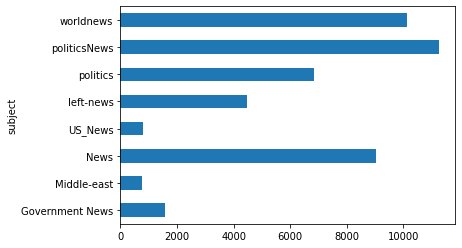

In [30]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="barh")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


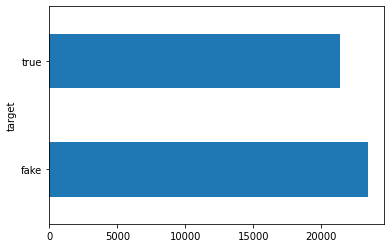

In [33]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="barh")
plt.show()

In [35]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

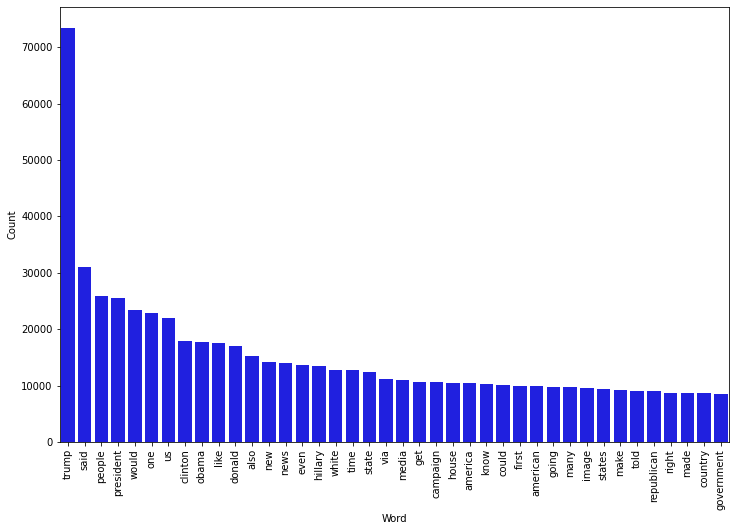

In [38]:
counter(data[data["target"] == "fake"], "text", 40)

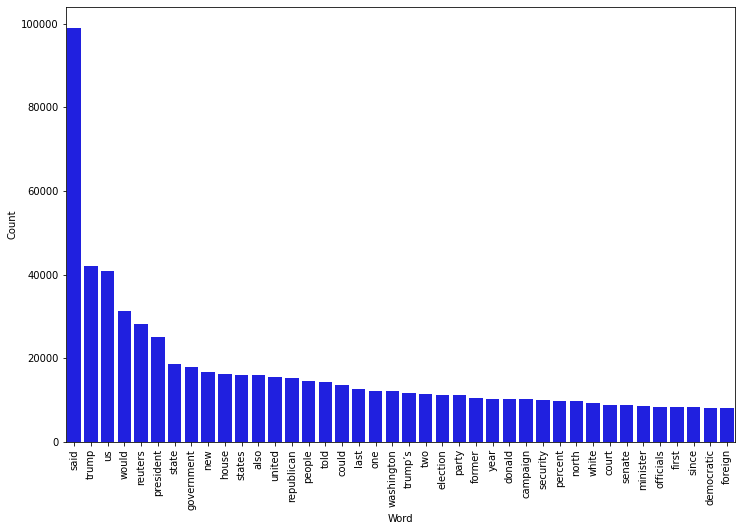

In [39]:
counter(data[data["target"] == "true"], "text", 40)

In [40]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)


In [42]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.84%


Confusion matrix, without normalization


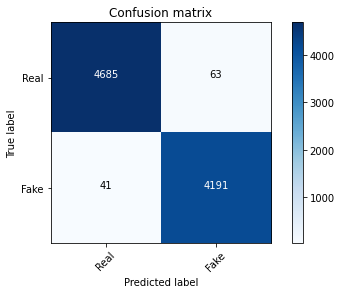

In [44]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.61%


Confusion matrix, without normalization


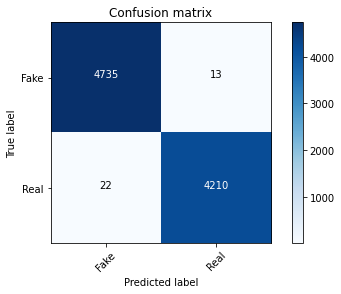

In [47]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [48]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 99.2%


Confusion matrix, without normalization


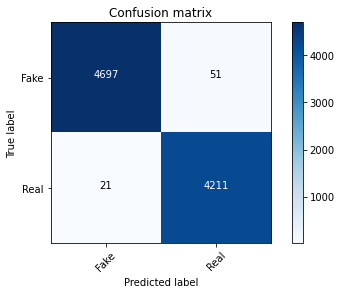

In [49]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])